In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

imbd_tv_series_df = pd.read_csv('imbd_tv_series.csv', index_col=0)
network_tv_series_df = pd.read_csv('network_tv_series.csv', index_col=0)

In [54]:
network_tv_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 5 columns):
tv_show        141 non-null object
network        141 non-null object
views_mil      141 non-null float64
season         110 non-null object
_18_49_demo    141 non-null float64
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


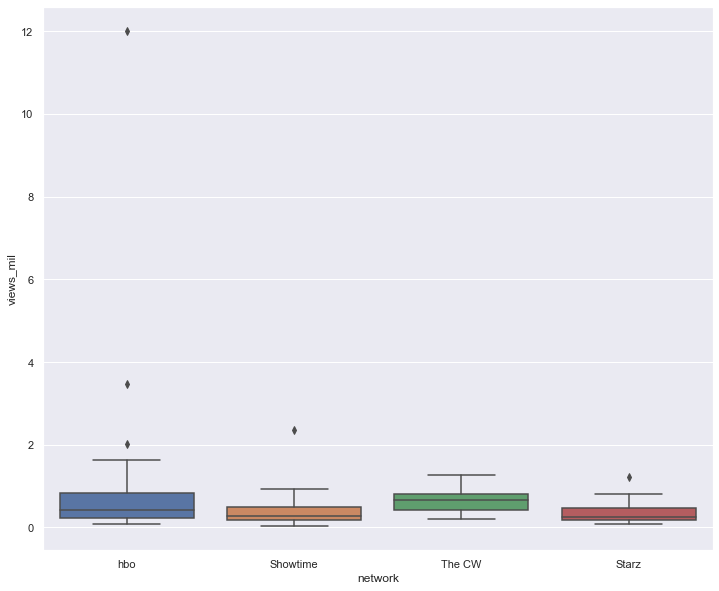

In [5]:
## EDA on the network_tv_series

# lets look into the distribution of views by millions in respect to the different network group
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x=network_tv_series_df['network'], y=network_tv_series_df['views_mil'])

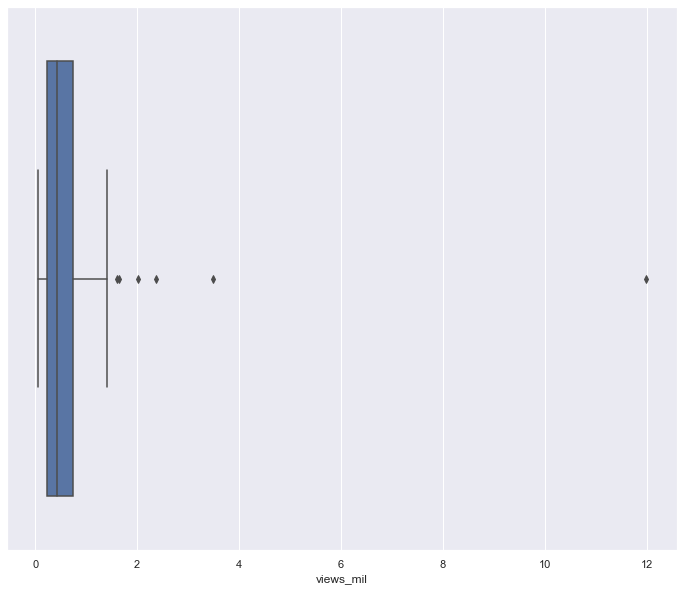

In [6]:
sns.boxplot(x= network_tv_series_df['views_mil'])

In [7]:
# Ohhhhh no looks like we have an outlier in our midst. Who can this mysterious unicorn of a tv series be?
# Gaining over 10 times the amount of average views compared to the other networks that are part of this analysis. 
# But of course Winter is coming.....literally.
ntv_df_o = network_tv_series_df.loc[0]
print(ntv_df_o)
# print(network_tv_series_df.loc[network_tv_series_df['network'] > 10]) ## need to change the 'network to int'

tv_show        Game of Thrones 
network                     hbo
views_mil                11.992
season                       s8
_18_49_demo                5.17
Name: 0, dtype: object


In [8]:
ntv_df_no = network_tv_series_df.loc[1:]
ntv_df_no.head()

,tv_show,network,views_mil,season,_18_49_demo
1,Big Little Lies,hbo,1.643,s2,0.65
2,Barry,hbo,1.597,s2,0.43
3,True Detective,hbo,1.247,s3,0.36
4,Perry Mason,hbo,0.937,s1,0.25
5,The Outsider,hbo,0.914,s1,0.25


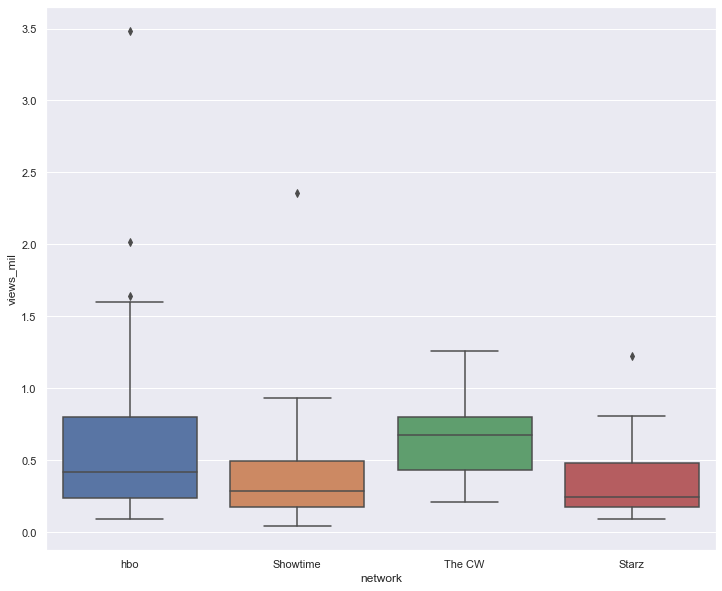

In [9]:
sns.boxplot(x=ntv_df_no['network'], y=ntv_df_no['views_mil'])

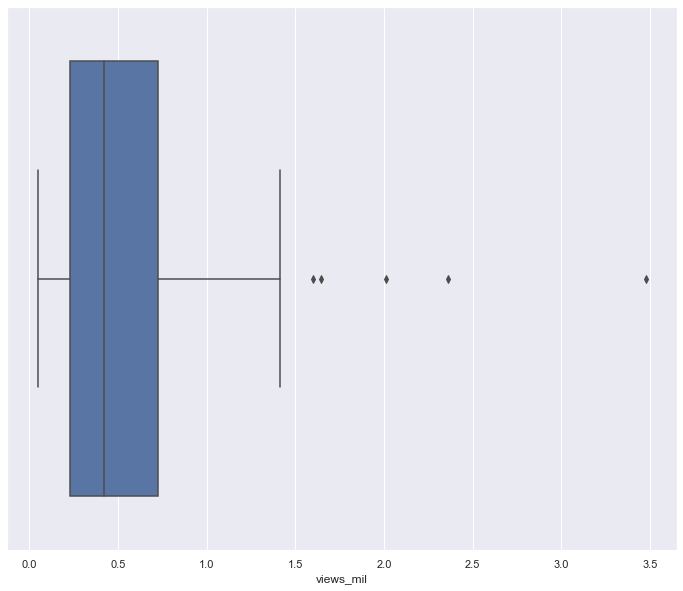

In [10]:
sns.boxplot(x= ntv_df_no['views_mil'])

In [23]:
# This is where I left off last night. As you can see tv shows usually falls within 0-1 million viewers for each network. 
# meaning those should be obtainable goals to achieve for Microsoft to aim for 

In [11]:
# IQR: is good to use to evaluate the distibution of data and keeping a threshold to identify outlier
Q1 = network_tv_series_df.quantile(0.25)
Q3 = network_tv_series_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

views_mil      0.506
_18_49_demo    0.160
dtype: float64


In [12]:
print(network_tv_series_df < (Q1 - 1.5 * IQR)) |(network_tv_series_df > (Q3 + 1.5 * IQR))

     _18_49_demo  network  season  tv_show  views_mil
0          False    False   False    False      False
1          False    False   False    False      False
2          False    False   False    False      False
3          False    False   False    False      False
4          False    False   False    False      False
..           ...      ...     ...      ...        ...
136        False    False   False    False      False
137        False    False   False    False      False
138        False    False   False    False      False
139        False    False   False    False      False
140        False    False   False    False      False

[141 rows x 5 columns]


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [15]:
ntv_df_noutlier = network_tv_series_df[~((network_tv_series_df < (Q1 - 1.5 * IQR)) |
                                         (network_tv_series_df > (Q3 + 1.5 * IQR))).any(axis=1)]
ntv_df_noutlier.head()

,tv_show,network,views_mil,season,_18_49_demo
3,True Detective,hbo,1.247,s3,0.36
4,Perry Mason,hbo,0.937,s1,0.25
5,The Outsider,hbo,0.914,s1,0.25
6,Westworld,hbo,0.812,s3,0.23
7,Watchmen,hbo,0.759,s1,0.20


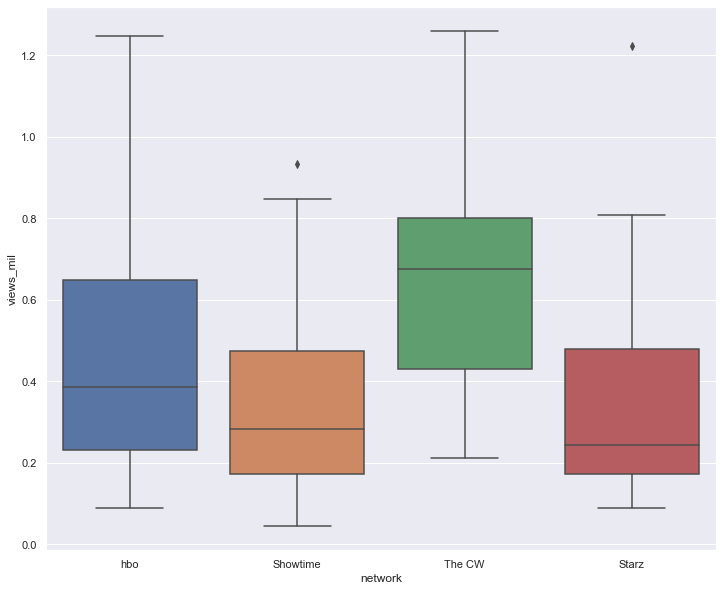

In [16]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x=ntv_df_noutlier['network'], y=ntv_df_noutlier['views_mil'])

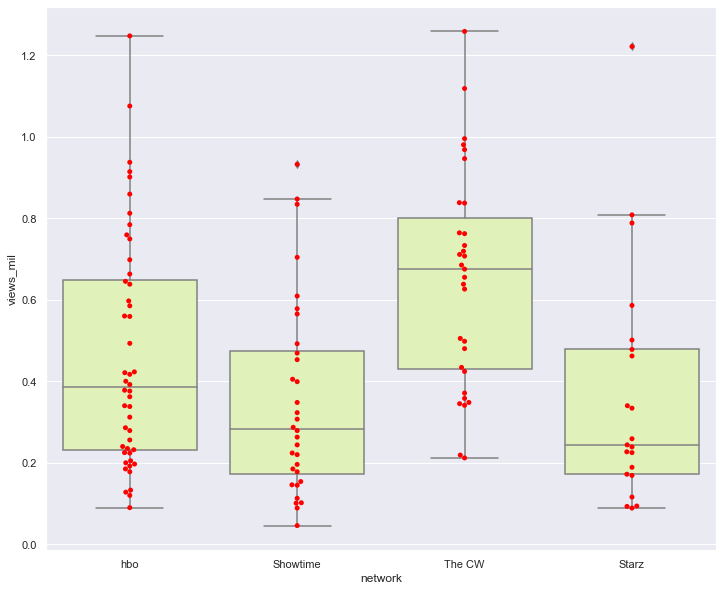

In [17]:
ax= sns.boxplot(x=ntv_df_noutlier['network'], y=ntv_df_noutlier['views_mil'], color = '#E4FCAF')
ax= sns.swarmplot(x=ntv_df_noutlier['network'], y=ntv_df_noutlier['views_mil'], color = 'red')

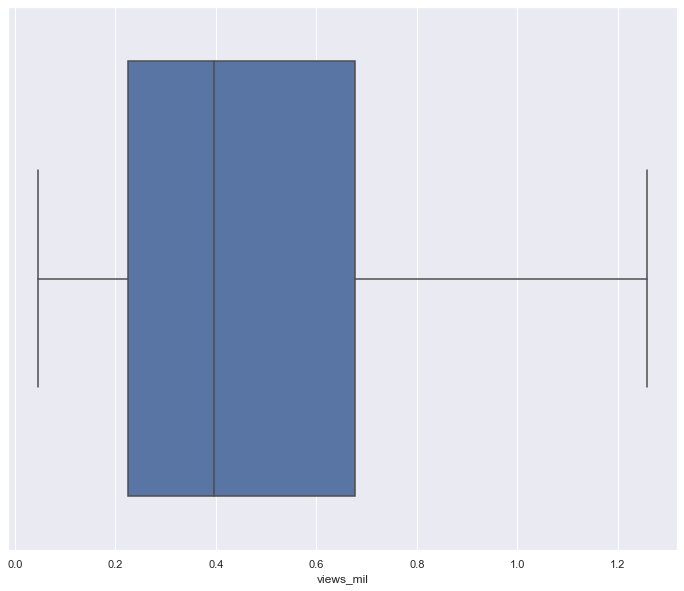

In [18]:
sns.boxplot(x=ntv_df_noutlier['views_mil'])

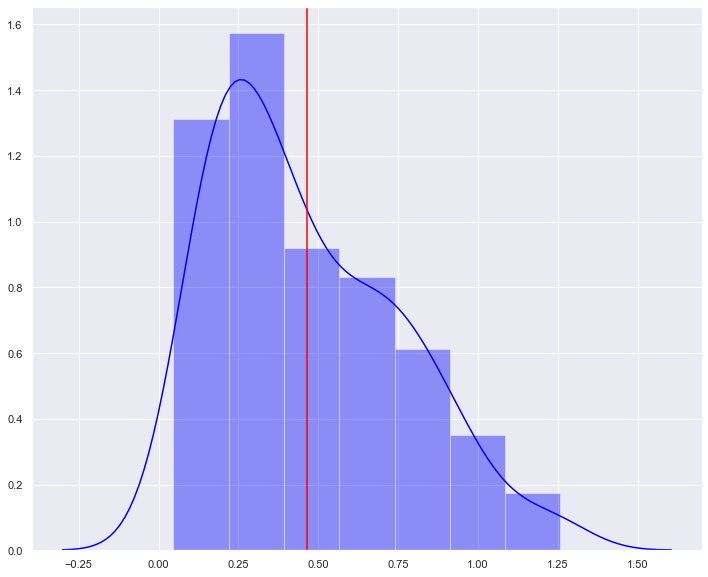

In [19]:
x= ntv_df_noutlier['views_mil'].values
mean= ntv_df_noutlier['views_mil'].mean()


sns.distplot(x, color= 'blue')

# plot the mean on the same graph
plt.axvline(mean,0,2, color= 'red')
# As you can see it is a Right skewd distribution because the mean is to the right.0

In [20]:
imbd_tv_series_df.head()

,tv_show,genre,year,imdb,votes
0,Sherlock,"Crime, Drama, Mystery",(2010–2017),9.1,781937
1,Julie and the Phantoms,"Comedy, Family, Fantasy",(2020– ),8.3,2883
2,Ozark,"Crime, Drama, Thriller",(2017– ),8.4,172935
3,Black Mirror,"Drama, Sci-Fi, Thriller",(2011– ),8.8,421268
4,Sons of Anarchy,"Crime, Drama, Thriller",(2008–2014),8.6,251613


In [21]:
imbd_tv_series_df.sort_values(by=['votes'], inplace=True, ascending=False)

In [22]:
imbd_tv_series_df1=pd.DataFrame.drop_duplicates(imbd_tv_series_df)
imbd_tv_series_df1.head()

,tv_show,genre,year,imdb,votes
46163,Game of Thrones,"Action, Adventure, Drama",(2011–2019),9.3,1711936
19427,Game of Thrones,"Action, Adventure, Drama",(2011–2019),9.3,1711922
16163,Game of Thrones,"Action, Adventure, Drama",(2011–2019),9.3,1711906
47328,Breaking Bad,"Crime, Drama, Thriller",(2008–2013),9.5,1399435
44640,Breaking Bad,"Crime, Drama, Thriller",(2008–2013),9.5,1399414


In [23]:
imbd_tv_series_df2=pd.DataFrame.drop_duplicates(imbd_tv_series_df1,subset='tv_show')

In [24]:
imbd_tv_series_df2.head()

,tv_show,genre,year,imdb,votes
46163,Game of Thrones,"Action, Adventure, Drama",(2011–2019),9.3,1711936
47328,Breaking Bad,"Crime, Drama, Thriller",(2008–2013),9.5,1399435
47646,The Walking Dead,"Drama, Horror, Thriller",(2010– ),8.2,835332
44741,Friends,"Comedy, Romance",(1994–2004),8.9,790266
0,Sherlock,"Crime, Drama, Mystery",(2010–2017),9.1,781937


In [25]:
imbd_tv_series_df2['genre'] = imbd_tv_series_df2['genre'].str.split(',', 3)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
imbd_tv_series_df2 = imbd_tv_series_df2.explode('genre')

In [27]:
imbd_tv_series_df2.head()

,tv_show,genre,year,imdb,votes
0,Sherlock,Crime,(2010–2017),9.1,781937
0,Sherlock,Drama,(2010–2017),9.1,781937
0,Sherlock,Mystery,(2010–2017),9.1,781937
1,Julie and the Phantoms,Comedy,(2020– ),8.3,2883
1,Julie and the Phantoms,Family,(2020– ),8.3,2883


In [28]:
imbd_tv_series_df2.sort_values(by=['votes'], inplace=True, ascending=False)

In [29]:
imbd_tv_series_df2.head()

,tv_show,genre,year,imdb,votes
46163,Game of Thrones,Drama,(2011–2019),9.3,1711936
46163,Game of Thrones,Action,(2011–2019),9.3,1711936
46163,Game of Thrones,Adventure,(2011–2019),9.3,1711936
47328,Breaking Bad,Thriller,(2008–2013),9.5,1399435
47328,Breaking Bad,Crime,(2008–2013),9.5,1399435


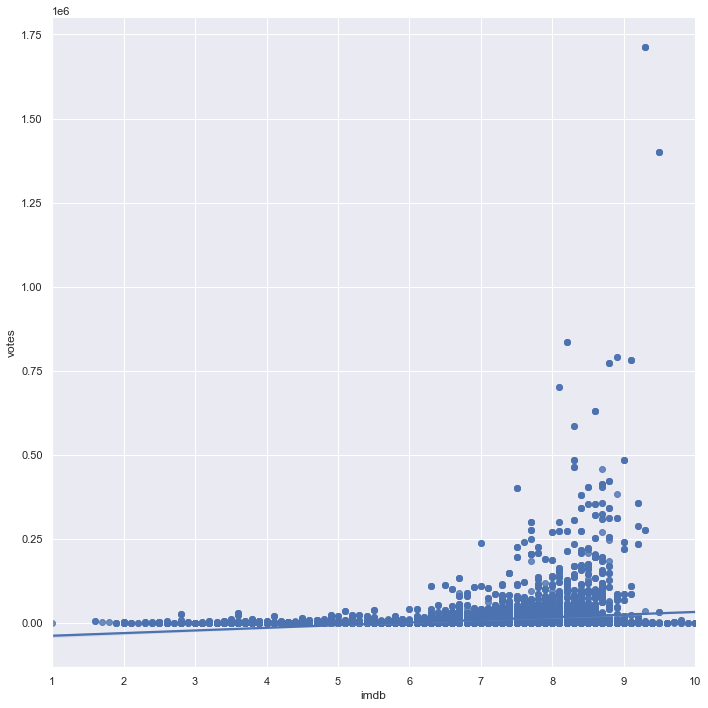

In [30]:
## EDA on the imbd_tv_series_df

sns.lmplot(x= 'imdb', y= 'votes', data= imbd_tv_series_df2, height = 10)

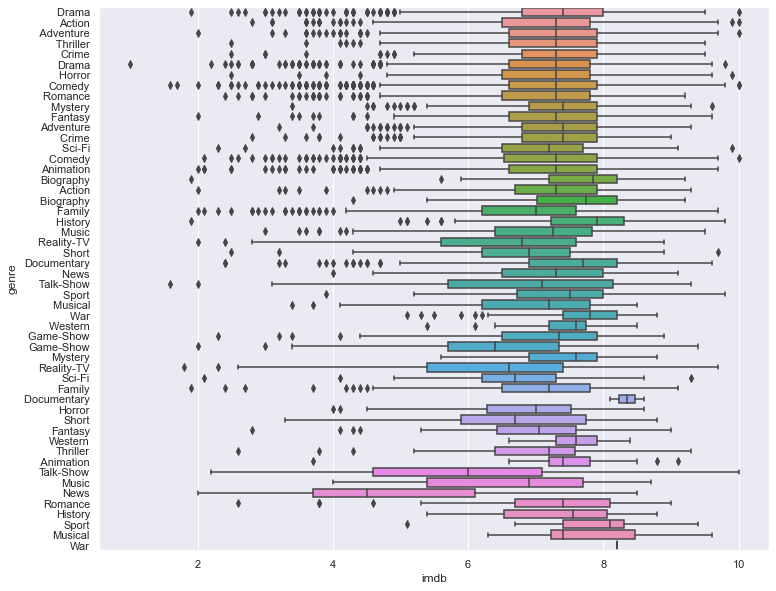

In [31]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x=imbd_tv_series_df2['imdb'], y=imbd_tv_series_df2['genre'])

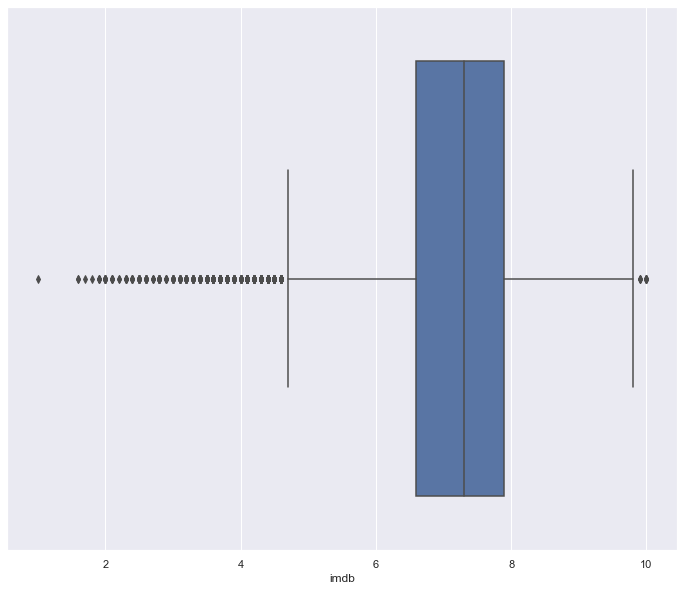

In [32]:
sns.boxplot(x=imbd_tv_series_df2['imdb'])

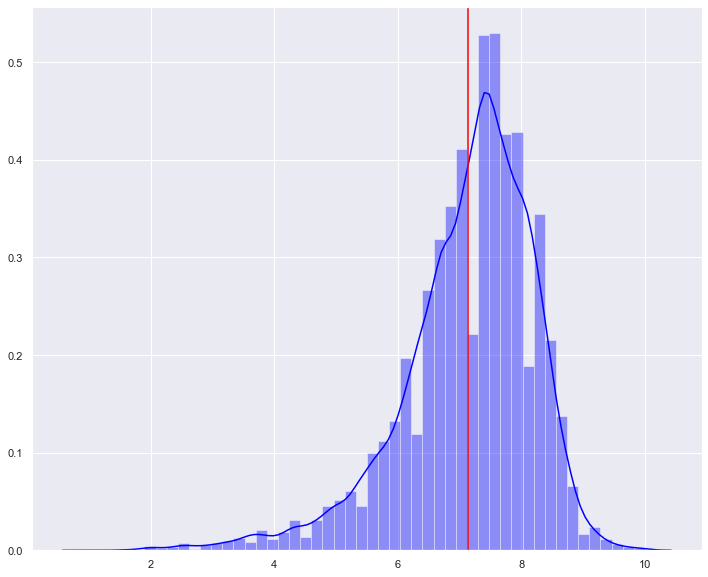

In [33]:
x1= imbd_tv_series_df2['imdb'].values
mean1= imbd_tv_series_df2['imdb'].mean()


sns.distplot(x1, color= 'blue')

# plot the mean on the same graph
plt.axvline(mean1,0,2, color= 'red')
# As you can see it is a left skewd distribution because the mean is to the left.0

In [34]:
len(imbd_tv_series_df2)

19380

In [35]:
imbd_tv_series_df_top = imbd_tv_series_df2.loc[imbd_tv_series_df2['imdb'] > 5]


In [36]:
len(imbd_tv_series_df_top)

18467

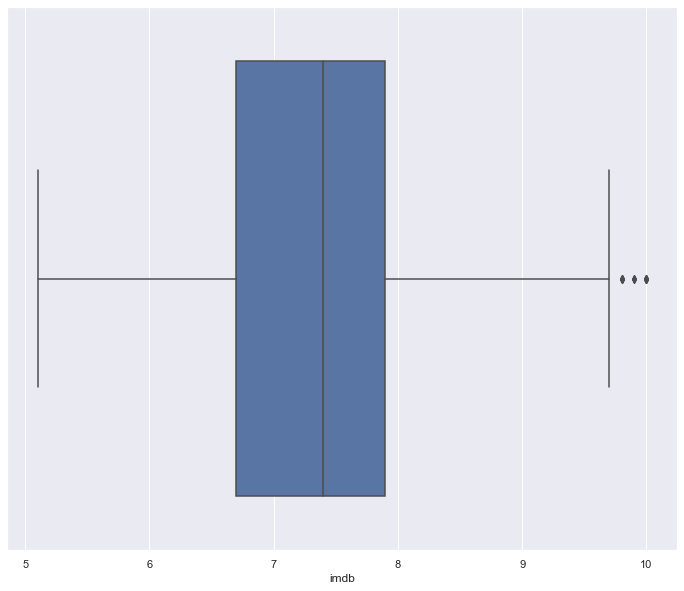

In [37]:
sns.boxplot(x=imbd_tv_series_df_top['imdb'])

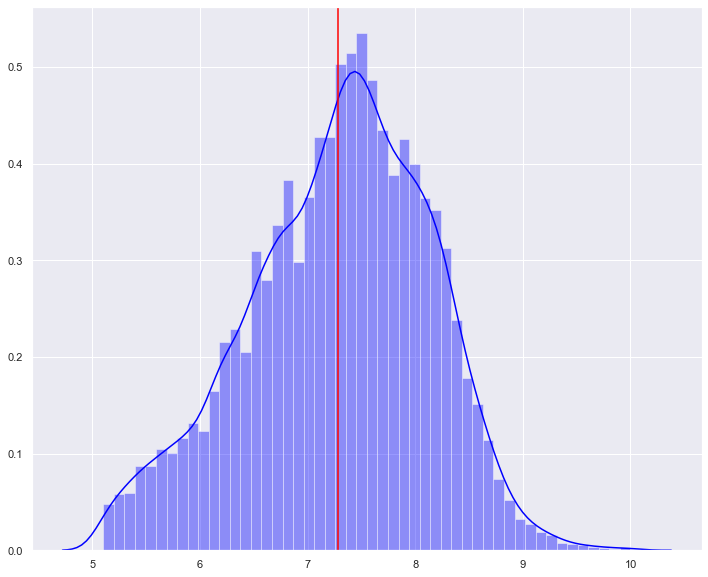

In [38]:
x2= imbd_tv_series_df_top['imdb'].values
mean2= imbd_tv_series_df_top['imdb'].mean()


sns.distplot(x2, color= 'blue')

# plot the mean on the same graph
plt.axvline(mean2,0,2, color= 'red')
# As you can see it is a left skewd distribution because the mean is to the left.0

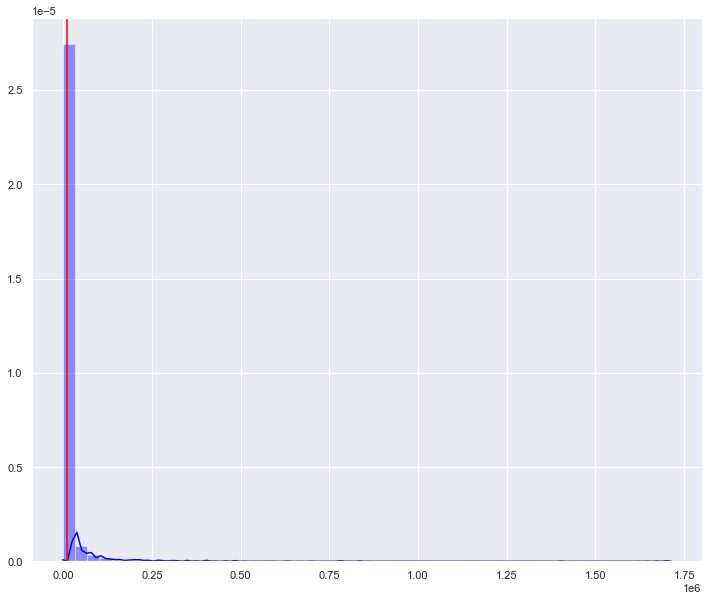

In [39]:
x2= imbd_tv_series_df_top['votes'].values
mean2= imbd_tv_series_df_top['votes'].mean()


sns.distplot(x2, color= 'blue')

# plot the mean on the same graph
plt.axvline(mean2,0,2, color= 'red')

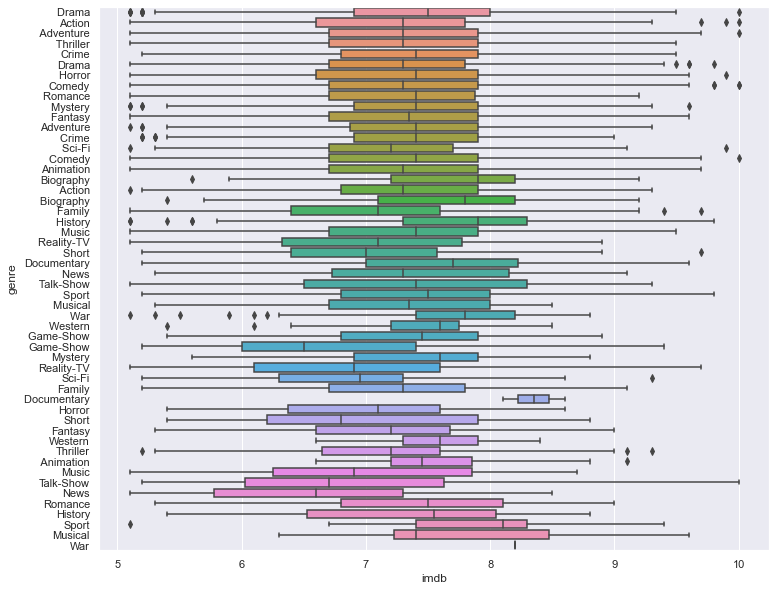

In [40]:
sns.boxplot(x=imbd_tv_series_df_top['imdb'], y=imbd_tv_series_df_top['genre'])

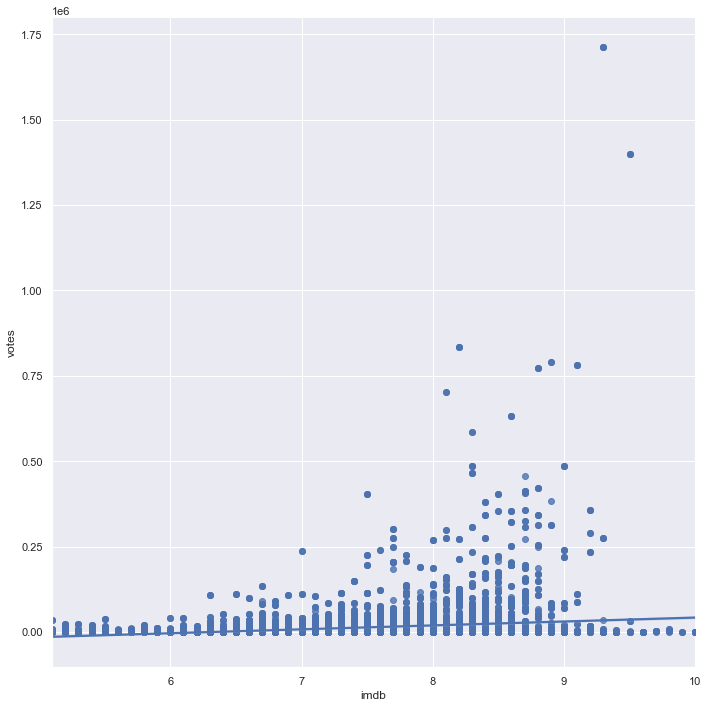

In [41]:
sns.lmplot(x= 'imdb', y= 'votes', data= imbd_tv_series_df_top, height = 10)

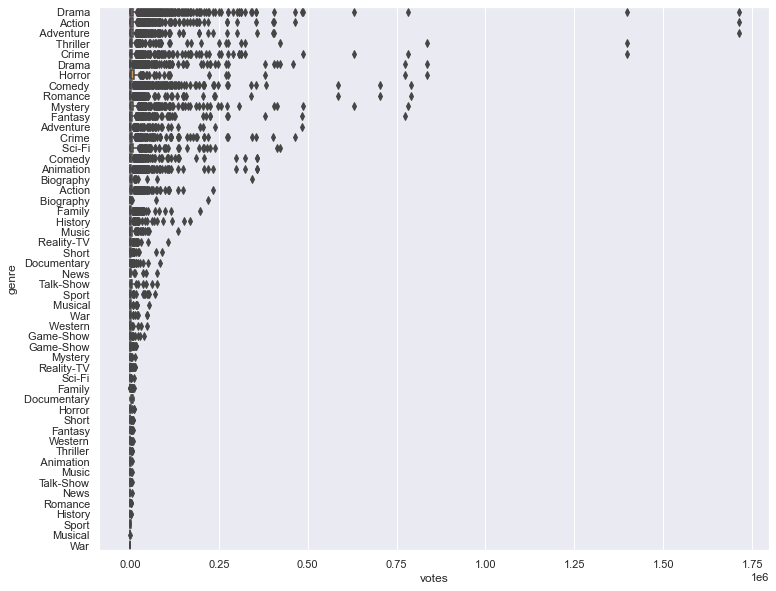

In [42]:
sns.boxplot(x=imbd_tv_series_df_top['votes'], y=imbd_tv_series_df_top['genre'])

In [43]:
Q1_imdb = imbd_tv_series_df_top.quantile(0.25)
Q3_imdb = imbd_tv_series_df_top.quantile(0.75)
IQR_imdb = Q3_imdb - Q1_imdb
print(IQR_imdb)

imdb        1.2
votes    4487.5
dtype: float64


In [44]:
print(imbd_tv_series_df_top < (Q1_imdb - 1.5 * IQR_imdb)) |(imbd_tv_series_df_top > (Q3_imdb + 1.5 * IQR_imdb))

       genre   imdb  tv_show  votes   year
46163  False  False    False  False  False
46163  False  False    False  False  False
46163  False  False    False  False  False
47328  False  False    False  False  False
47328  False  False    False  False  False
...      ...    ...      ...    ...    ...
7983   False  False    False  False  False
6827   False  False    False  False  False
7551   False  False    False  False  False
8334   False  False    False  False  False
7122   False  False    False  False  False

[18467 rows x 5 columns]


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [45]:
imbd_tv_series_df_noutlier = imbd_tv_series_df_top[~((imbd_tv_series_df_top < (Q1_imdb - 1.5 * IQR_imdb)) |
                                         (imbd_tv_series_df_top > (Q3_imdb + 1.5 * IQR_imdb))).any(axis=1)]
imbd_tv_series_df_noutlier.head()

,tv_show,genre,year,imdb,votes
488,Tales from the Loop,Sci-Fi,(2020– ),7.5,11615
488,Tales from the Loop,Drama,(2020– ),7.5,11615
489,Major Crimes,Drama,(2012–2018),7.7,11611
489,Major Crimes,Crime,(2012–2018),7.7,11611
489,Major Crimes,Action,(2012–2018),7.7,11611


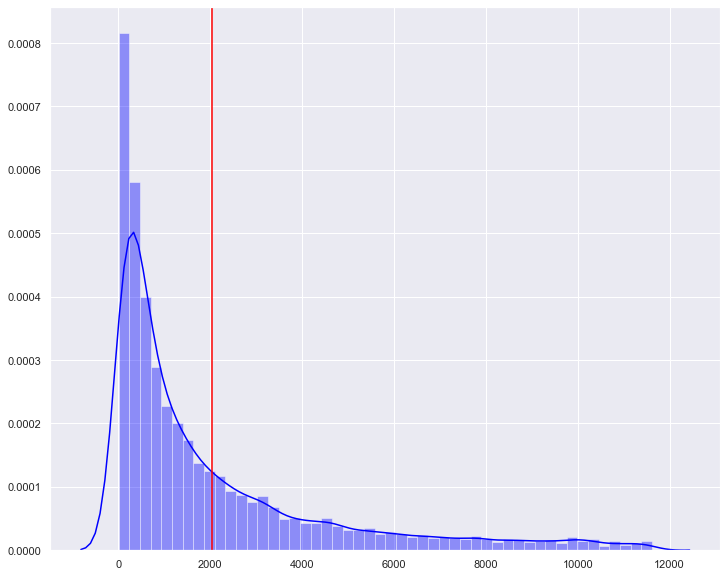

In [46]:
x3= imbd_tv_series_df_noutlier['votes'].values
mean3= imbd_tv_series_df_noutlier['votes'].mean()

sns.distplot(x3, color= 'blue')

# plot the mean on the same graph
plt.axvline(mean3, color= 'red')

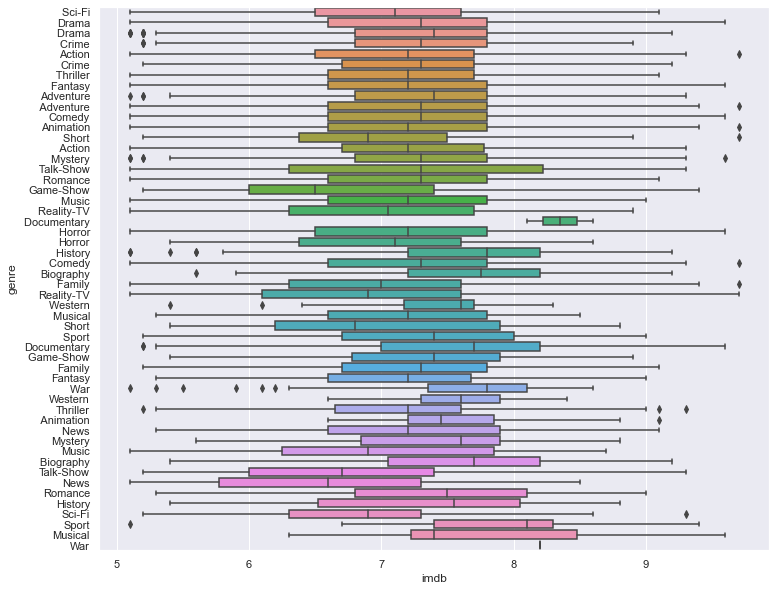

In [47]:
sns.boxplot(x=imbd_tv_series_df_noutlier['imdb'], y=imbd_tv_series_df_noutlier['genre'])

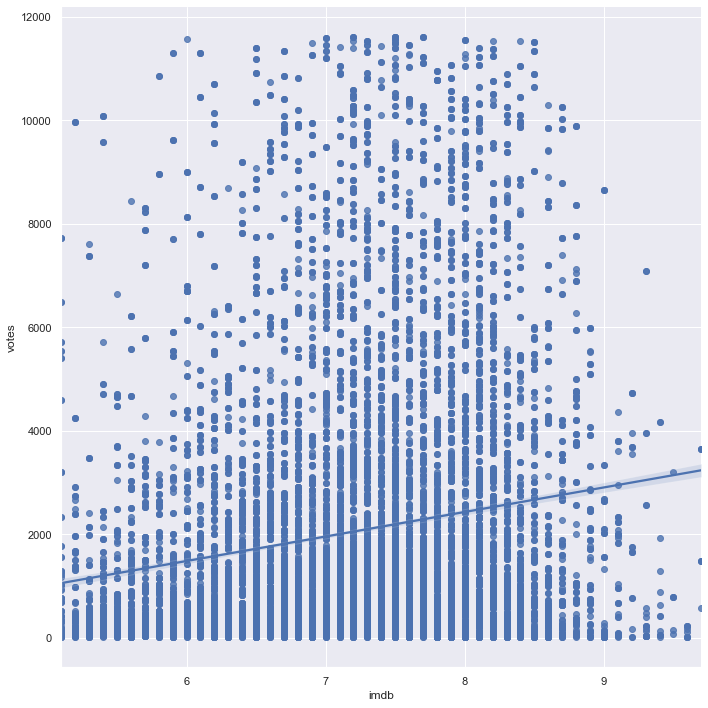

In [48]:
sns.lmplot(x= 'imdb', y= 'votes', data= imbd_tv_series_df_noutlier, height = 10)

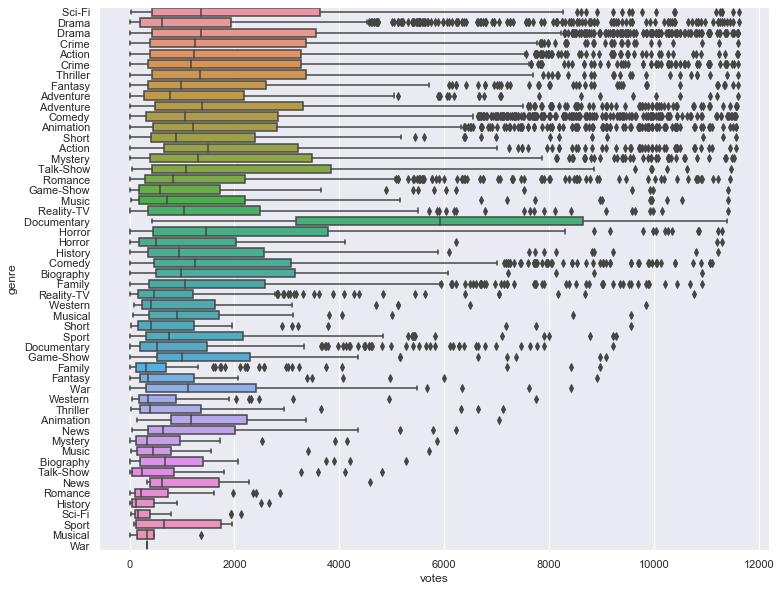

In [125]:
sns.boxplot(x=imbd_tv_series_df_noutlier['votes'], y=imbd_tv_series_df_noutlier['genre'])

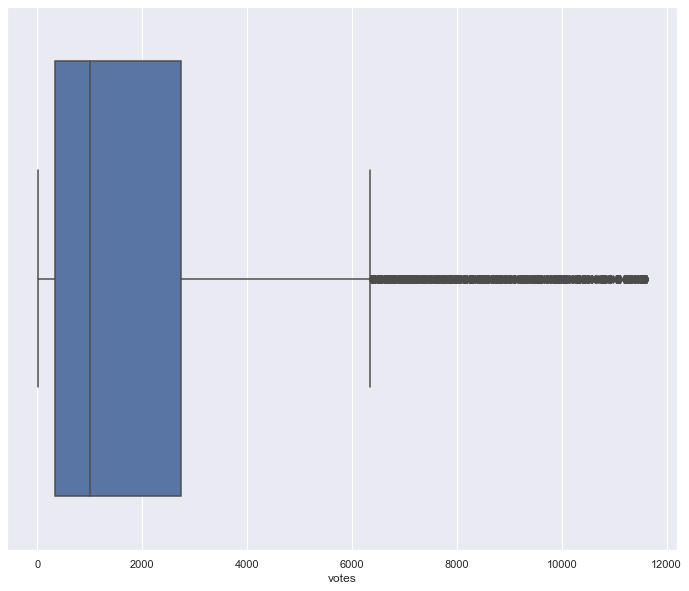

In [49]:
sns.boxplot(x=imbd_tv_series_df_noutlier['votes'])

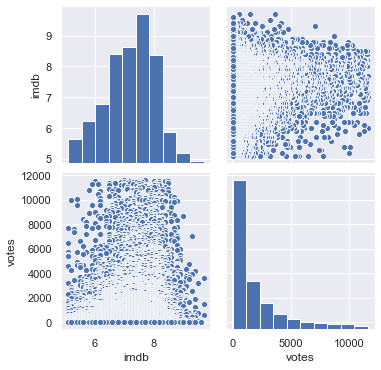

In [50]:
sns.pairplot(imbd_tv_series_df_noutlier)

In [51]:
its_df =imbd_tv_series_df_noutlier.groupby(['genre']).sum()
its_df.index

Index([' Action', ' Adventure', ' Animation', ' Biography', ' Comedy',
       ' Crime', ' Documentary', ' Drama', ' Family', ' Fantasy', ' Game-Show',
       ' History', ' Horror', ' Music', ' Musical', ' Mystery', ' News',
       ' Reality-TV', ' Romance', ' Sci-Fi', ' Short', ' Sport', ' Talk-Show',
       ' Thriller', ' War', ' Western', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'],
      dtype='object', name='genre')

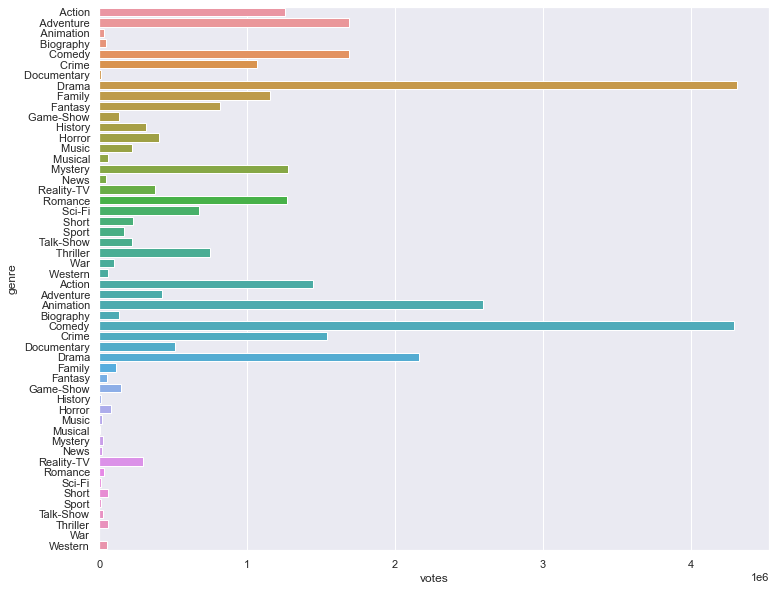

In [52]:
sns.barplot(x=its_df['votes'], y=its_df.index)

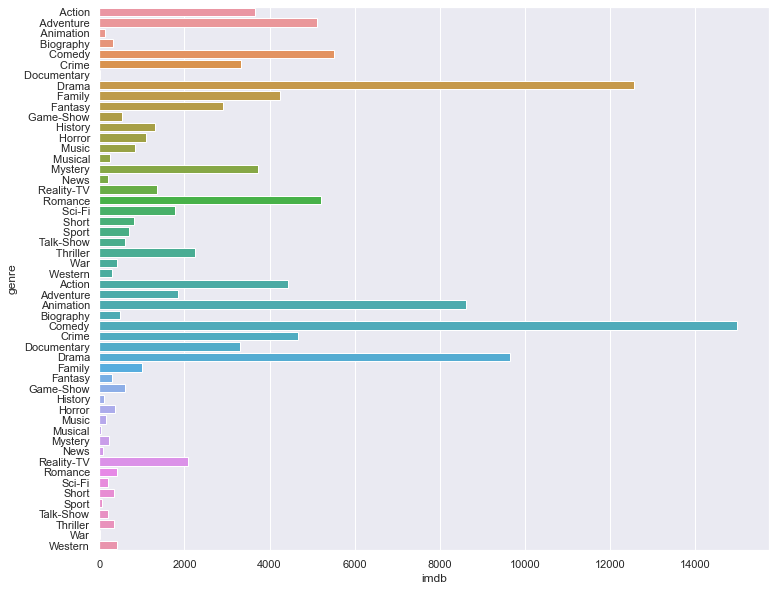

In [53]:
sns.barplot(x=its_df['imdb'], y=its_df.index)

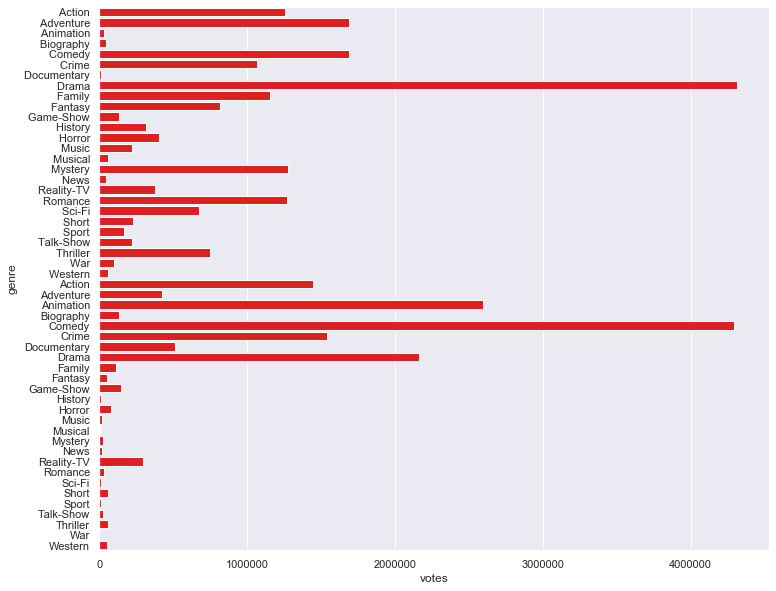

In [166]:
ax = sns.barplot(x=its_df['imdb'], y=its_df.index, color='blue')
ax = sns.barplot(x=its_df['votes'], y=its_df.index, color='red')

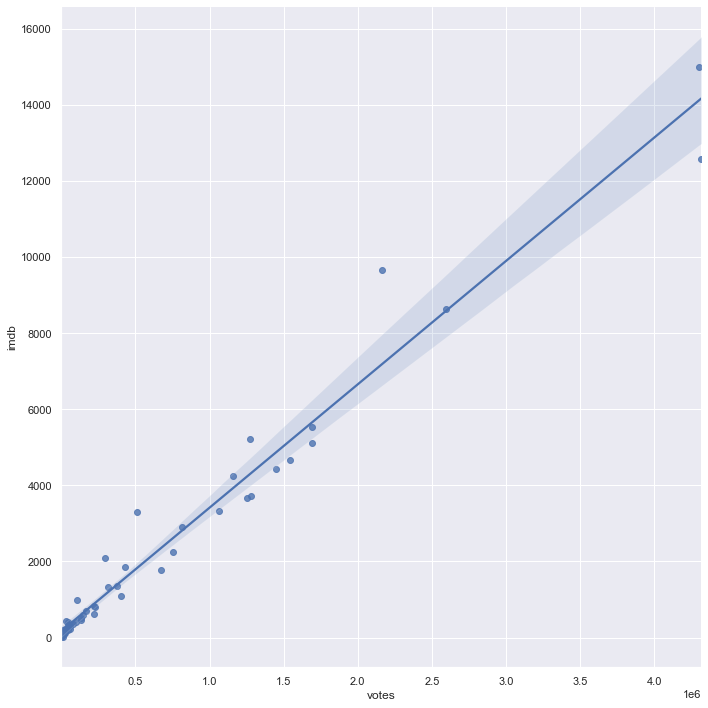

In [54]:
sns.lmplot(x= 'votes', y= 'imdb', data=its_df , height = 10)

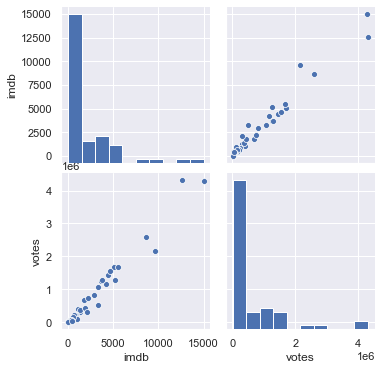

In [55]:
sns.pairplot(data=its_df)

In [56]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [62]:
import matplotlib.pyplot as plt
import squarify
import numpy as np
import
import plotly_express as px



In [63]:
fig = px.treemap(its_df,
                 path=its_df.index,
                 values= 'imdb')

AttributeError: module 'plotly_express' has no attribute 'treemap'